# Homework 1: Reading data and regression
## Due September 5th

In class we've been working on developing the tools for linear regression.  In this homework, we'll use those tools to show that one of the original 'big data' problems can be solved quite credibly with ordinary least squares.  Note that this exercise is primarily intended to do two things: 1) provide you with some practice gathering data, and 2) evaluate your ability to reason somewhat abstractly about models.  With respect to the second point, it is in your grade's interest to provide complete and well-reasoned answers to narrative questions posed.  A correct answer can be awarded very few points if its reasoning is absent or unclear, and an incorrect answer can be awarded full points if it is well argued.   

Please turn in your work via github classroom.

## The big one
If you've ever lived in an area prone to seismic activity, you know that people are always a little apprehensive about *the big one*, that giant earthquake (Magnitude greater than 7) that is going to break the pots and collapse the overpasses.  However, the big one rarely happens... until it does.  What happens more frequently is smaller earthquakes.  And even more frequently than that, even smaller earthquakes.  In fact, it's long been understood that earthquake frequency has an inverse relationship with magnitude.  Here, we're going to quantify that relationship for the west coast of the US.  

## Data wrangling
The first thing that we'll need to do is to aquire a dataset that can help us say something about earthquake frequency.  Fortunately, the United States Geologic Survey keeps such a database.  

First, navigate to https://earthquake.usgs.gov/earthquakes/search/.  This is the USGS' central repository for earthquake data.  We'll be interested in data from the last twenty years.  Enter the appropriate date.  Next, we're interested in data from the west coast of the lower 48.  Use the Custom Geographic Region button on the right side of the page, followed by the Draw Rectangle on the Map button.  Draw a rectangle around the west coast, from the Canadian to Mexican border.  Next, open the Output Options tab and select .csv (comma separated values, a plain text format).  Finally, under Limit Results, enter 19999 (the site will throw an error if you make this value bigger).  This series of commands will deliver the ~20k most recent earthquakes of all sizes to occur in this region of the world.  It may take a moment for their server to pull your query together. Download the file.

Next, import the data into ipython.  This is easily done with [Pandas' read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [1]:
# Use pandas to import the earthquake data file here
import pandas as pandemonium

query = pandemonium.read_csv('query.csv')




Interrogate the Pandas dataframe for the available fields using its built in method 'keys'


In [2]:
query.keys()


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

We're primarily interested in determining the relationship between relative frequency and magnitude.  Extract the magnitude variable from the pandas data frame using the 'mag' key.  

Next, you'll need to determine the number of earthquakes that occured in the data as a function of magnitude.  This is easily done by deciding on a set of bins, and then counting the number of items in each bin.  This is also known as a [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and is easily computed using either numpy or matplotlib.  You'll want to use a fairly large number of bins, say 50 (equally spaced).  *Note that the histogram function provided by either of the above libraries returns total counts rather than relative frequencies: you'll need to compute relative frequencies by dividing the returned counts by the total number of earthquakes in the dataset.*

In [3]:
import numpy as np
mags = query['mag']

magsHisto = np.histogram(mags, 50)
bins = magsHisto[1]
relFreq = magsHisto[0]/len(mags)
bins
print(len(magsHisto[0]),len(magsHisto[1]))

50 51


**(20 pts) Make a plot with bin centroids on the $x$-axis and relative frequency on the $y$-axis.  Based on your results, please provide a few sentences describing whether the model $y = w_0 + w_1 x$ is a good fit to the data, if $x$ represents earthquake magnitude and $y$ represents relative frequency.**

!Answers go here

In [4]:
import matplotlib.pyplot as plt

plt.plot(bins[:len(relFreq)],relFreq)
plt.xlabel('earthquake magnitude')
plt.ylabel('relative requency')
plt.show()

'''
The graph shown above looks like an exponential function:
namely, the data provided demonstrates an exponential rise (from right to left) in frequency for earthquakes of small
magnitude and an exponential decrease (from left to right) for earthquakes of larger magnitude. A linear regression
(y = w_0 + w_1x)
model does not fit an exponential function with much accuracy (as it assumes a linear decrease or increase in frequency),
therefore it would be better to use an exponential regression model instead.
'''

<Figure size 640x480 with 1 Axes>

'\nThe graph shown above looks like an exponential function:\nnamely, the data provided demonstrates an exponential rise (from right to left) in frequency for earthquakes of small\nmagnitude and an exponential decrease (from left to right) for earthquakes of larger magnitude. A linear regression\n(y = w_0 + w_1x)\nmodel does not fit an exponential function with much accuracy (as it assumes a linear decrease or increase in frequency),\ntherefore it would be better to use an exponential regression model instead.\n'

As it turns out, a physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics, and is given by a so-called *power-law*
$$
y = ax^b
$$
**(20pts) If you wanted to directly fit this power-law model to these data, would you be able to use the linear regression code that we've already developed to do so?  If so, how?  If not, why not?**

!Answers go here

yes we could: Taking the log of the power-law model yeilds something looking very similar to our linear regression code:
$$
log(y) = log(ax^b) = log(a) + b*log(x)
$$
So for our linear regression we take the log of y, and of x, letting our weights be log(a) which may as well be just some value w_0 (log of a constant is just a constant), and b = w_1, giving:
$$
log(y) = w_0 + w_1log(x)
$$
Then convert back from log-space.


As it turns out, it is not possible to use linear regression to fit this model directly.  However, it can be done by using a clever transformation of the data.  **(20pts) Plot the base-10 logarithm of the event counts.  Now does a linear model seem like a good fit?  If the power law is a good fit to the untransformed data, why does it make sense that a linear model should fit the log-transformed data (HINT: take the logarithm of both sides of the power law)**

**(UPDATE!)** I should have noted this before: The earthquake magnitude $x$ has *already* been log-transformed, which is to say that a magnitude 7 is 10 times more powerful than a magnitude 6.  The power law stated above applies to the earthquake strength prior to it having the logarithm taken.  As such, a more reasonable way to state the question would be as follows: A physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics and is given by a so-called *power-law*
$$
y = a P^b,
$$
where $P=10^x$. Show that taking the logarithm of both sides of this equation leads to a linear relationship between the earthquake magnitude $x$ and the log-frequency $\text{log}_{10}(y)$. 

!Answers go here

C:\Users\RandyCocks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


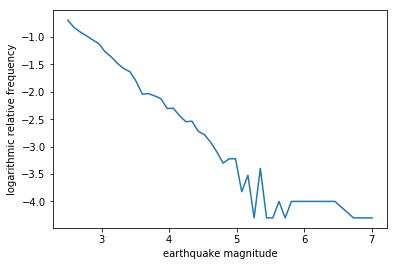

'\nExponential increase/decrease is linear in log-space, and there is a one-to-one relationship between going in and out of\nlogspace; namely, performing a linear operation in log space corresponds to an exponential operation outside of log space.\nThis is demonstrated by the fact that log(y = ax^b) = log(y) = log(a) + b*log(x) which is a linear function.\n'

In [5]:
import numpy as np
logbins = np.log10(bins)
logfreq = np.log10(relFreq)

bins = bins[:len(relFreq)]
bins = bins[logfreq > -999]
logfreq = logfreq[logfreq > -999]


plt.plot(bins[:len(logfreq)],logfreq)
plt.xlabel('earthquake magnitude')
plt.ylabel('logarithmic relative frequency')
plt.show()

'''
Exponential increase/decrease is linear in log-space, and there is a one-to-one relationship between going in and out of
logspace; namely, performing a linear operation in log space corresponds to an exponential operation outside of log space.
This is demonstrated by the fact that log(y = ax^b) = log(y) = log(a) + b*log(x) which is a linear function.
'''

Finally, **(40pts) use one of the methods that you developed for linear regression in class to fit a line to the log-transformed counts.  What is the slope of that line?  Is the model a good fit for all sizes of earthquake?**

!Answers go here

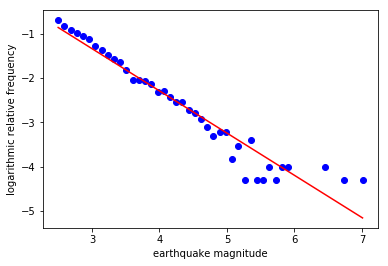

NameError: name 'w_1' is not defined

In [7]:

from numpy.linalg import inv

def vanderMonde(array):
    vand = np.ones((array.size,2))
    for i in range(array.size):
        vand[i][1] = bins[i]
    return vand

vand = vanderMonde(bins)
ws = np.dot(inv(np.dot(np.transpose(vand),vand)),np.dot(np.transpose(vand),logfreq))


plt.plot(bins[:len(logfreq)],logfreq,'bo')

plt.plot(bins,ws[0] + ws[1]*bins,'r-')

plt.xlabel('earthquake magnitude')
plt.ylabel('logarithmic relative frequency')
plt.show()
print('slope: ',w_1)

'''
Instead of using an approximation, I've calculated exact values for the weights for this given data set. This model
accurately predicts frequency for earthquake sizes of 2.5 to ~ 4.7, but not so for
magnitudes between 4.7 and 7. Given this model likely doesnt suffer from over-fitting, it is probably safe to use it 
for smaller values as well, namely magnitudes less than 2.5. I imagine the inaccuracy on the higher 
end of the magnitude spectrum is due to lack of data or occurances of big events in the given data set.
'''
